# Importing Libraries

In [15]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

# Loding Data with Generator Concept 

In [8]:
# generators concept is used to load data into memory in batches to overcome memory failures
# as a batch gets processed then another batch gets loaded and so on
train_ds = keras.utils.image_dataset_from_directory(
    directory = r"C:\Users\Acer\images\training",
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = r'C:\Users\Acer\images\test\test_set',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 8020 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


# Normalizing Pixels of images

In [9]:
# Normalize all images pixels range within 1 and 0 
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

# Map function will take 1 image at a time will transform it means normalize it and will store it in train_ds 
train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

# Creating the CNN MODEL 

In [10]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [13]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
251/251 [==============================] - 292s 1s/step - loss: 2.3436 - accuracy: 0.5587 - val_loss: 0.9916 - val_accuracy: 0.5145
Epoch 2/10
251/251 [==============================] - 291s 1s/step - loss: 0.7464 - accuracy: 0.6051 - val_loss: 0.7402 - val_accuracy: 0.6185
Epoch 3/10
251/251 [==============================] - 289s 1s/step - loss: 0.6409 - accuracy: 0.6556 - val_loss: 0.6155 - val_accuracy: 0.6375
Epoch 4/10
251/251 [==============================] - 292s 1s/step - loss: 0.5525 - accuracy: 0.7203 - val_loss: 0.6378 - val_accuracy: 0.6605
Epoch 5/10
251/251 [==============================] - 289s 1s/step - loss: 0.4932 - accuracy: 0.7652 - val_loss: 0.6771 - val_accuracy: 0.6035
Epoch 6/10
251/251 [==============================] - 296s 1s/step - loss: 0.4173 - accuracy: 0.8080 - val_loss: 0.4859 - val_accuracy: 0.7655
Epoch 7/10
251/251 [==============================] - 306s 1s/step - loss: 0.3659 - accuracy: 0.8393 - val_loss: 0.5628 - val_accuracy: 0.7160

# Plotting Model Accuracy with validation Accuracy

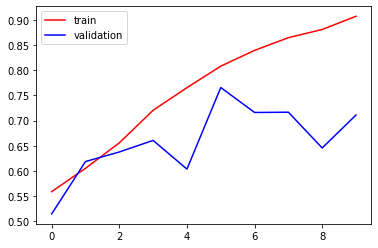

In [16]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

# Plotting Loss  with validation Loss

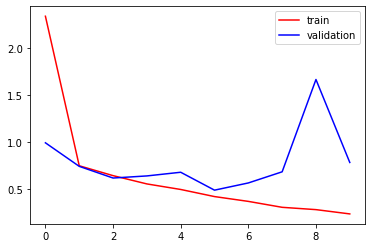

In [17]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()